# STUDENT DEPRESSION PREDICTION MODEL


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**LOAD THE DATA**

In [4]:
df1 = pd.read_csv("student_depression_dataset.csv")
df1.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [6]:
df1.shape

(27901, 18)

In [8]:
df1.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Exploratory Data Analysis ##
**Distribution of the Target Variable**

C:\Users\Admin\AppData\Local\Temp\ipykernel_23048\3835889102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Depression', data=df1, palette=["#2ecc71", "#e74c3c"],


<Figure size 1000x600 with 0 Axes>

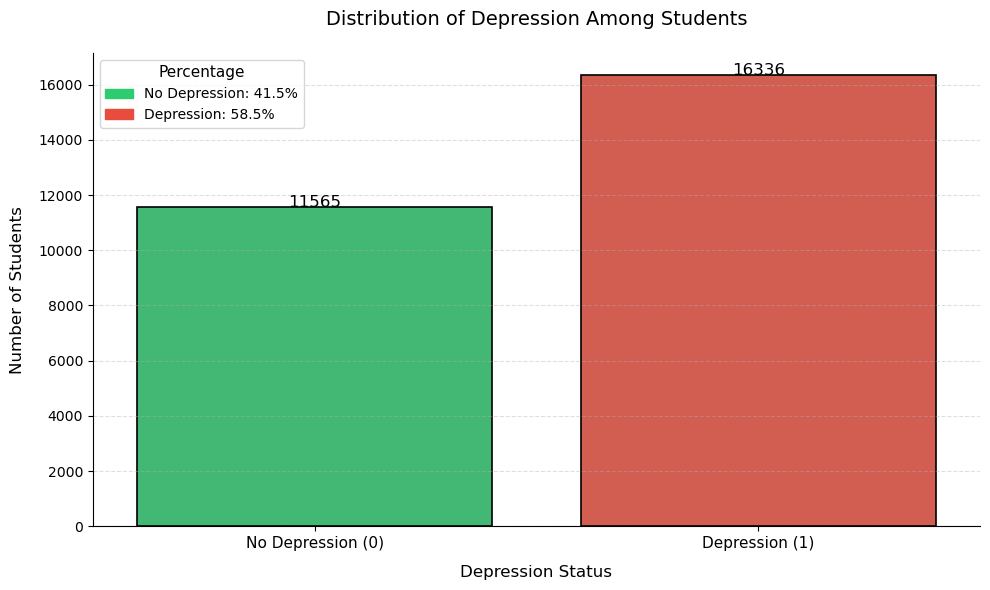

In [13]:
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Depression', data=df1, palette=["#2ecc71", "#e74c3c"], 
                   edgecolor='black', linewidth=1.2)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)}',
            ha="center", fontsize=12)

# Calculate and display percentage
total = len(df1)
percentage = df1['Depression'].value_counts(normalize=True) * 100

plt.title("Distribution of Depression Among Students", fontsize=14, pad=20)
plt.xlabel("Depression Status", fontsize=12, labelpad=10)
plt.ylabel("Number of Students", fontsize=12, labelpad=10)
plt.xticks(ticks=[0, 1], labels=["No Depression (0)", "Depression (1)"], fontsize=11)

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Remove top and right spines
sns.despine()

# Add percentage information in the legend
handles = [plt.Rectangle((0,0),1,1, color=c) for c in ["#2ecc71", "#e74c3c"]]
labels = [f"No Depression: {percentage[0]:.1f}%", f"Depression: {percentage[1]:.1f}%"]
plt.legend(handles, labels, title="Percentage", title_fontsize=11)

plt.tight_layout()
plt.show()

**Analyzing Categorical Genders** ***e.g Depression by Gender*** 

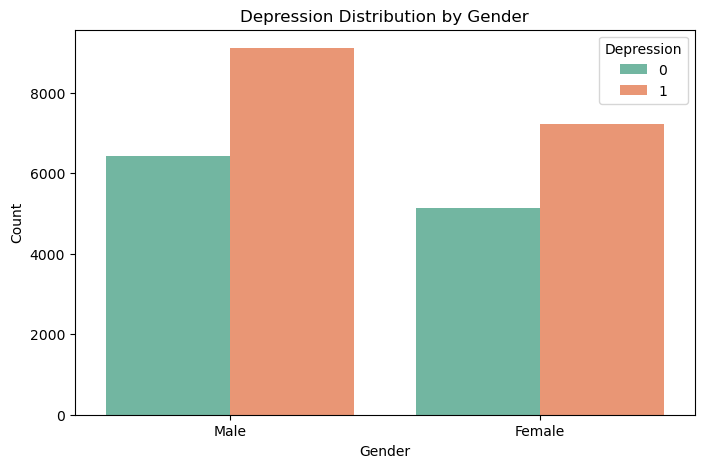

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Depression', data=df1, palette="Set2")
plt.title("Depression Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.show()

**Distribution by Nummerical Features**

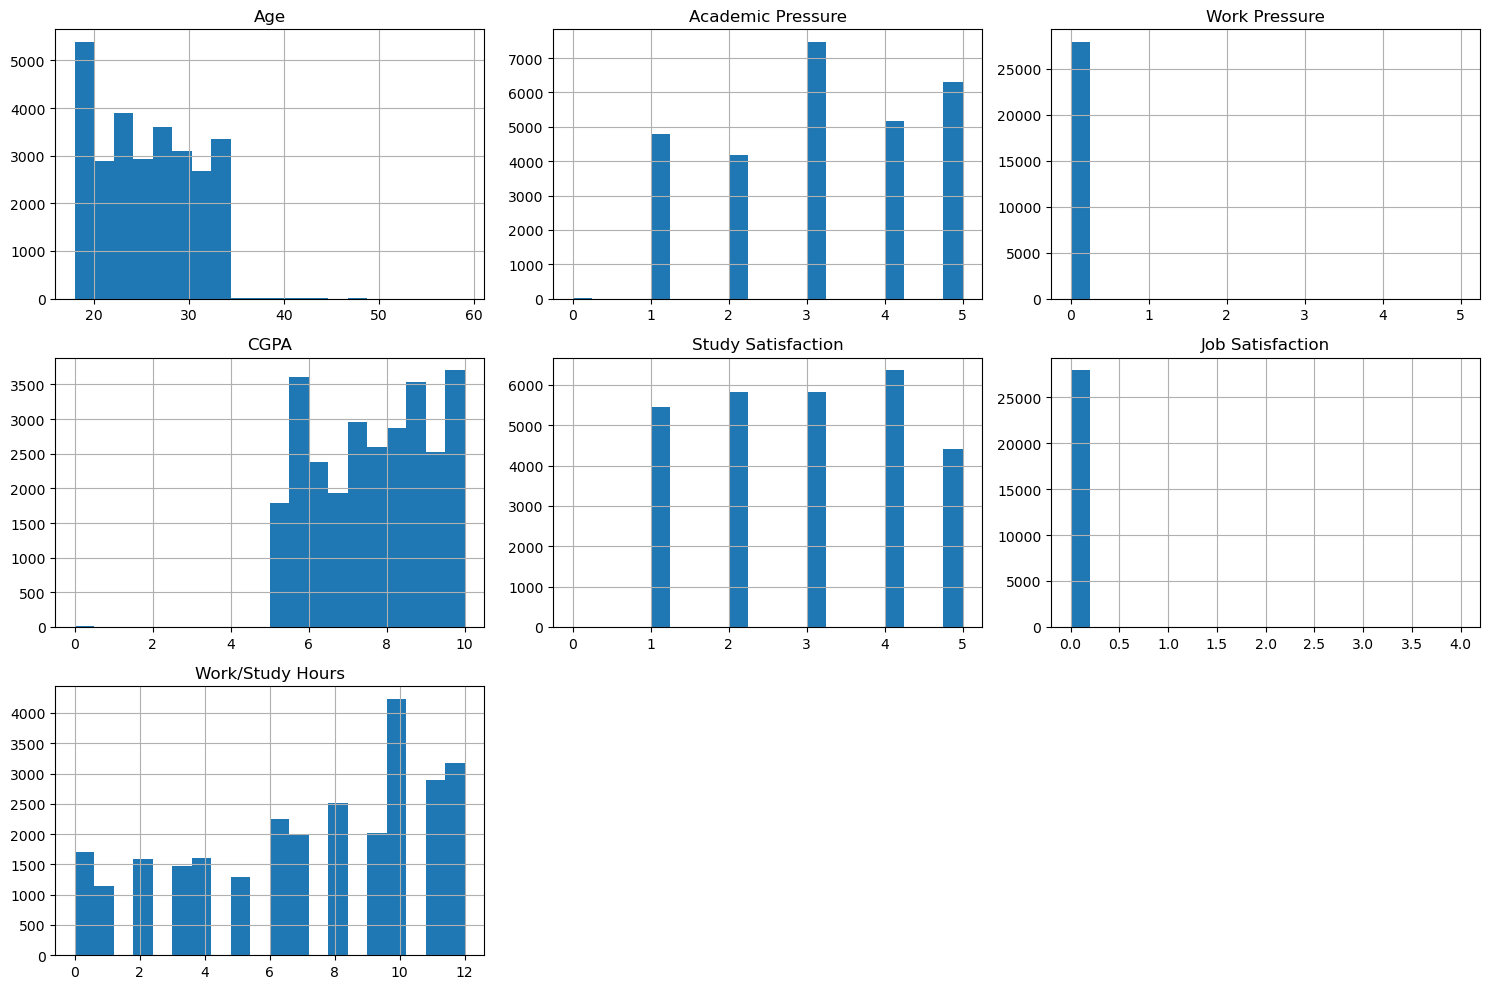

In [19]:
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
df1[num_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()


**Drop features that are not useful in prediction**

In [22]:
df2 = df1.drop(["id", "Gender", "City", "Profession", "Sleep Duration",'Dietary Habits', 'Degree','Study Satisfaction', 'Job Satisfaction'],axis="columns")
df2.shape

(27901, 9)

In [24]:
df2.head()

,Age,Academic Pressure,Work Pressure,CGPA,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,33.0,5.0,0.0,8.97,Yes,3.0,1.0,No,1
1,24.0,2.0,0.0,5.90,No,3.0,2.0,Yes,0
2,31.0,3.0,0.0,7.03,No,9.0,1.0,Yes,0
3,28.0,3.0,0.0,5.59,Yes,4.0,5.0,Yes,1
4,25.0,4.0,0.0,8.13,Yes,1.0,1.0,No,0


**Check for null values in the dataset**

In [27]:
df2.isnull().sum()

Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [29]:
df2.replace({"Yes": 1, "No": 0}, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_23048\3297472057.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({"Yes": 1, "No": 0}, inplace = True)


In [31]:
df2.head()

,Age,Academic Pressure,Work Pressure,CGPA,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,33.0,5.0,0.0,8.97,1,3.0,1.0,0,1
1,24.0,2.0,0.0,5.90,0,3.0,2.0,1,0
2,31.0,3.0,0.0,7.03,0,9.0,1.0,1,0
3,28.0,3.0,0.0,5.59,1,4.0,5.0,1,1
4,25.0,4.0,0.0,8.13,1,1.0,1.0,0,0


**Check the data types in all the columns. This is useful because the prediction model only takes int or float features as input.**

In [34]:
for col in df2.columns:
    types = df2[col].apply(type).unique()
    print(f"{col}: {types}")


Age: [<class 'float'>]
Academic Pressure: [<class 'float'>]
Work Pressure: [<class 'float'>]
CGPA: [<class 'float'>]
Have you ever had suicidal thoughts ?: [<class 'int'>]
Work/Study Hours: [<class 'float'>]
Financial Stress: [<class 'str'>]
Family History of Mental Illness: [<class 'int'>]
Depression: [<class 'int'>]


***Financial stress*** **column has str values, we will have to replace it with float/int values**


In [37]:
df2["Financial Stress"].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

**Remove "?" from the data set as it will bring errors (Data Cleaning)**

In [40]:
df2 = df2.drop(df2[df2['Financial Stress'] == '?'].index)

In [42]:
# First, convert to float (to handle the '.0'), then to int
df2['Financial Stress'] = df2['Financial Stress'].astype(float).astype(int)



In [44]:
df4 = df2.copy()
df4.head(3)

,Age,Academic Pressure,Work Pressure,CGPA,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,33.0,5.0,0.0,8.97,1,3.0,1,0,1
1,24.0,2.0,0.0,5.90,0,3.0,2,1,0
2,31.0,3.0,0.0,7.03,0,9.0,1,1,0


In [46]:
df4.shape

(27898, 9)

**NOW TRAIN THE MODEL**

In [49]:
X = df4.drop(["Depression"], axis = "columns")
X.head(3)

,Age,Academic Pressure,Work Pressure,CGPA,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,33.0,5.0,0.0,8.97,1,3.0,1,0
1,24.0,2.0,0.0,5.90,0,3.0,2,1
2,31.0,3.0,0.0,7.03,0,9.0,1,1


In [51]:
X.shape

(27898, 8)

In [53]:
y = df4.Depression
y.head(3)

0    1
1    0
2    0
Name: Depression, dtype: int64

In [55]:
len(y)

27898

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


**USING RANDOM FOREST:**

In [60]:
from sklearn.ensemble import RandomForestClassifier
rdm = RandomForestClassifier(n_estimators=20)
rdm.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [61]:
rdm.score(X_test,y_test)

0.8159498207885305

**The accuracy is pretty good, but let's try LOGISTIC REGRESSION**

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2312
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580



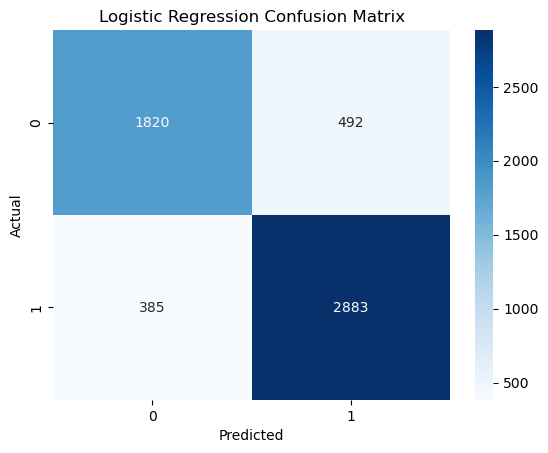

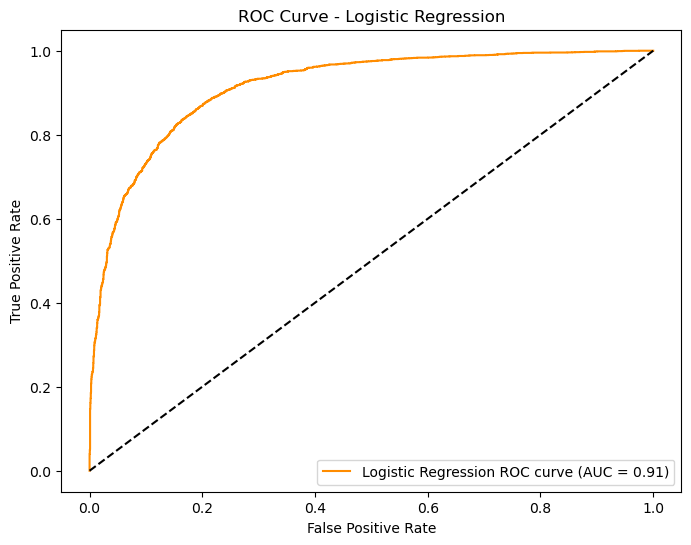

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

# Predictions and evaluation
y_pred_log = model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_prob_log = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression ROC curve (AUC = {roc_auc_log:.2f})', color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**The accuracy is also good, let's try Support Vector Machine**

In [78]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8435483870967742

### Predicting .. ###

In [70]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

**Let's try with different parameters of C**

In [80]:

model1 = SVC(C=10)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8439068100358423

**Saving the model**

In [88]:
import joblib  # No longer through sklearn

# Save model
joblib.dump(model, 'model_dep.pkl') 

# Load model
model = joblib.load('model_filename.pkl')